In [1]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [2]:
PATH = "wildfire-test/"
sz=224

In [3]:
arch = resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 1/1 [00:00<00:00,  1.12it/s]


In [5]:
learn.load('wildfire-model')

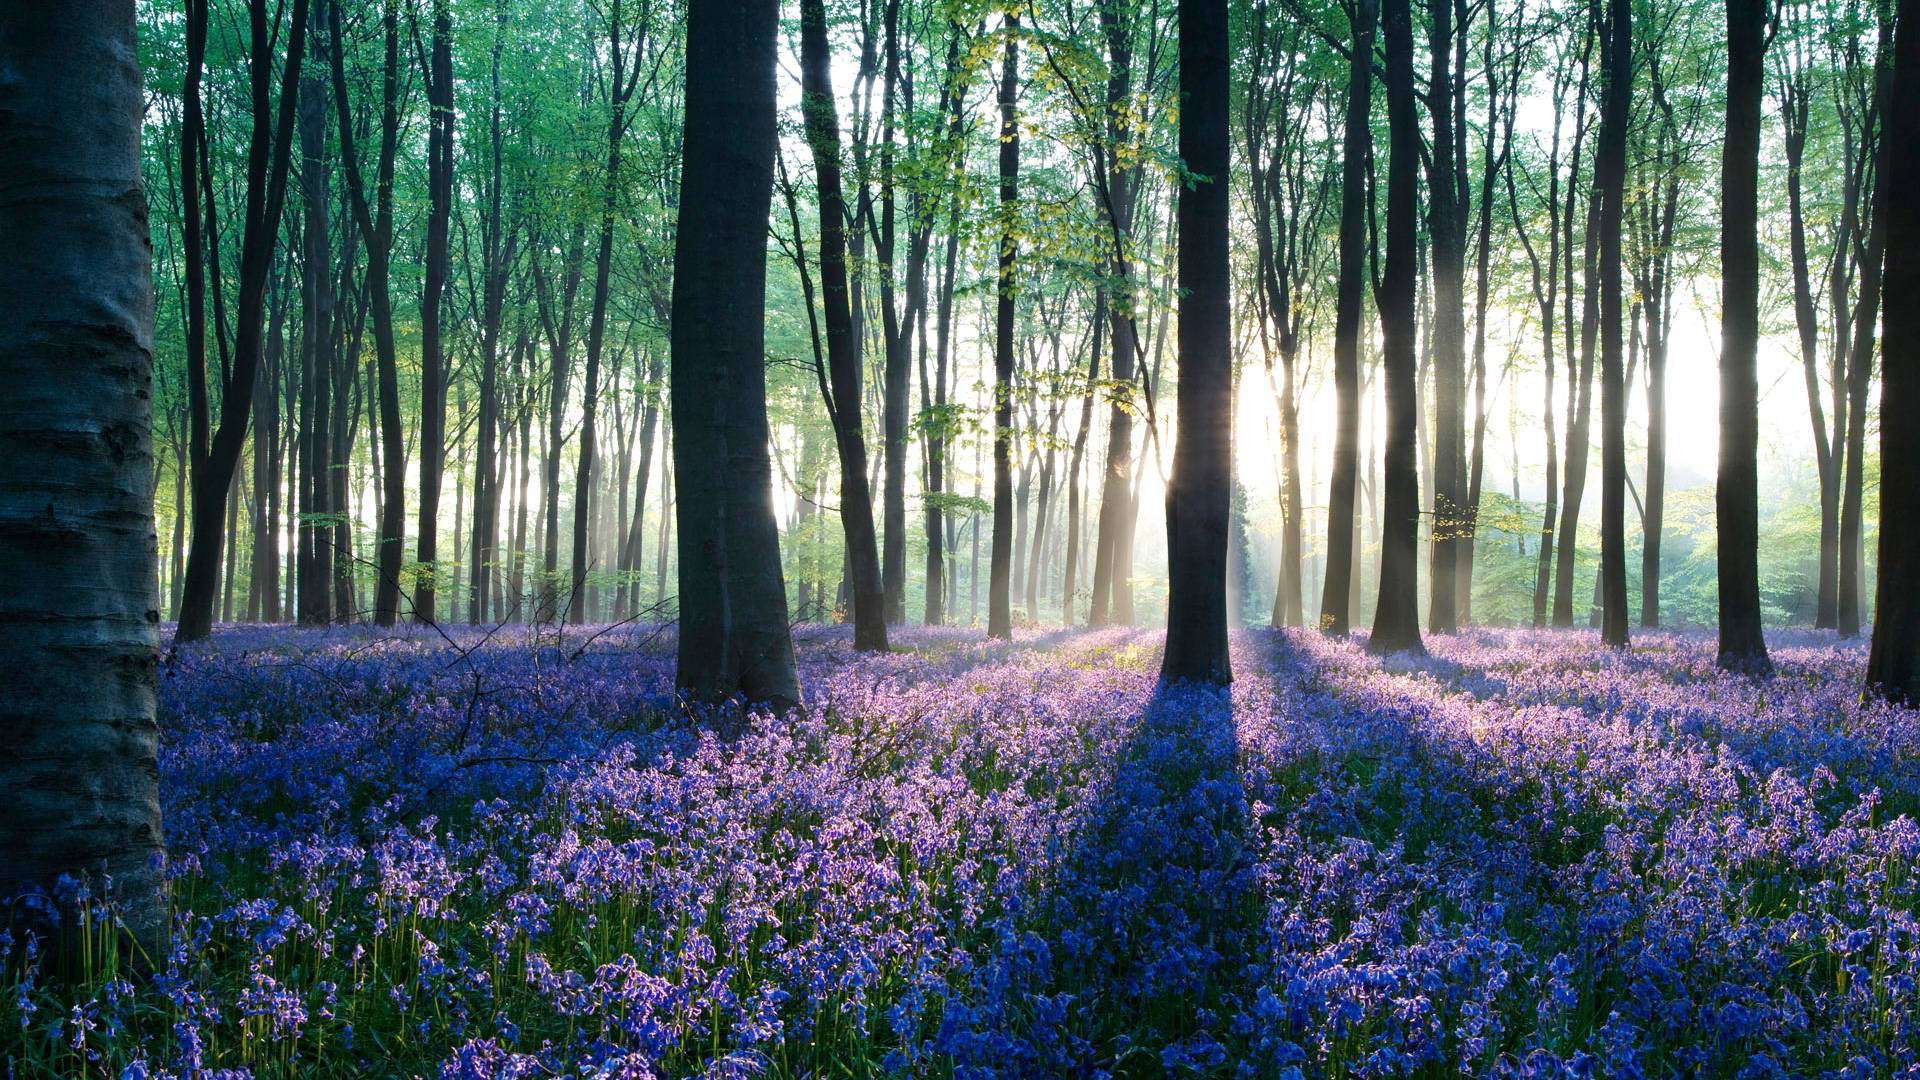

In [57]:
Image.open(image_path)

In [48]:
def predict_single_image(image_path):
    trn_tfms, val_tfms = tfms_from_model(arch,sz) # get transformations
    im = val_tfms(open_image(image_path))
    learn.precompute=False # We'll pass in a raw image, not activations
    preds = learn.predict_array(im[None])
    return np.exp(preds)[0, 1] # preds are log probabilities of classes

In [55]:
image_path = 'wildfire-test/train/wildfire/amazing-nature-spring-image.jpg'

In [56]:
predict_single_image(image_path)

0.007985174